# Übung: Glätten (Winddaten)


## Aufgabe:

* Glätten eines verrauschten Signals und Reduzieren der Datenpunkte

Genauer: Das Agglomerieren der Datenpunkte erzeugt nebenbei ein geglättetes Signal.

## Tipps:

1. Löschen fehlender Daten am Anfang und Ende (warum?)
2. Agglomerieren und Reduzieren der Anzahl der Datenpunkte (warum?)
3. Sicherstellen der Äquidistanz der Zeitwerte (warum?)
4. Sicherstellen, dass zu jedem Zeitwert ein Signalwert vorliegt (warum?)

## Plotten

* Größe des Plots anpassen, Kurzform:

~~~
df.plot(figsize=(10,5))
~~~

* Größe des Plots anpassen, Langform:

~~~
#dpi controls relative size of font
fig = plt.figure(figsize=(6,3), dpi=150)
# create an ax object 
ax = plt.axes() 
# don't forget to tell pandas.plot() about new ax object
dg[['mean10', 'mean30']].plot(ax=ax) 
~~~

In [1]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fn = 'data/amp_winddaten-01.01.2016.zip'
df = pd.read_csv(fn)
df.head()

/home/rp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,Datum,Uhrzeit,8:00 Uhr Prognose [MW],Online Hochrechnung [MW],nn
0,01.01.2016,00:00 - 00:15,1168.0,1541.0,NaN
1,01.01.2016,00:15 - 00:30,1174.0,1527.0,NaN
2,01.01.2016,00:30 - 00:45,1170.0,1489.0,NaN
3,01.01.2016,00:45 - 01:00,1196.0,1467.0,NaN
4,01.01.2016,01:00 - 01:15,1222.0,1465.0,NaN


In [2]:
df['Uhrzeit'] = df['Uhrzeit'].str[:5]
df.head()

,Datum,Uhrzeit,8:00 Uhr Prognose [MW],Online Hochrechnung [MW],nn
0,01.01.2016,00:00,1168.0,1541.0,NaN
1,01.01.2016,00:15,1174.0,1527.0,NaN
2,01.01.2016,00:30,1170.0,1489.0,NaN
3,01.01.2016,00:45,1196.0,1467.0,NaN
4,01.01.2016,01:00,1222.0,1465.0,NaN


In [3]:
df['Datetime']= df['Datum'] + " " + df['Uhrzeit']
df = df.set_index(pd.to_datetime(df['Datetime'], format="%d.%m.%Y %H:%S"))
df.head()

,Datum,Uhrzeit,8:00 Uhr Prognose [MW],Online Hochrechnung [MW],nn,Datetime
Datetime,,,,,,
2016-01-01 00:00:00,01.01.2016,00:00,1168.0,1541.0,NaN,01.01.2016 00:00
2016-01-01 00:00:15,01.01.2016,00:15,1174.0,1527.0,NaN,01.01.2016 00:15
2016-01-01 00:00:30,01.01.2016,00:30,1170.0,1489.0,NaN,01.01.2016 00:30
2016-01-01 00:00:45,01.01.2016,00:45,1196.0,1467.0,NaN,01.01.2016 00:45
2016-01-01 01:00:00,01.01.2016,01:00,1222.0,1465.0,NaN,01.01.2016 01:00


In [4]:
df = df.iloc[:,2:3]
df.columns=['MW']
dg = df.copy()
dg

,MW
Datetime,
2016-01-01 00:00:00,1168.0
2016-01-01 00:00:15,1174.0
2016-01-01 00:00:30,1170.0
2016-01-01 00:00:45,1196.0
2016-01-01 01:00:00,1222.0
...,...
2023-11-01 22:00:45,6169.0
2023-11-01 23:00:00,6049.0
2023-11-01 23:00:15,5941.0


In [5]:

dg.head()

,MW
Datetime,
2016-01-01 00:00:00,1168.0
2016-01-01 00:00:15,1174.0
2016-01-01 00:00:30,1170.0
2016-01-01 00:00:45,1196.0
2016-01-01 01:00:00,1222.0


In [6]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273408 entries, 2016-01-01 00:00:00 to 2023-11-01 23:00:45
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   MW      272835 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [7]:
dg = dg.resample("d").mean() 
dg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2862 entries, 2016-01-01 to 2023-11-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MW      2850 non-null   float64
dtypes: float64(1)
memory usage: 44.7 KB


In [8]:
dg = dg.interpolate()
dg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2862 entries, 2016-01-01 to 2023-11-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MW      2862 non-null   float64
dtypes: float64(1)
memory usage: 44.7 KB


In [9]:
dg.shape

(2862, 1)

<Axes: xlabel='Datetime'>

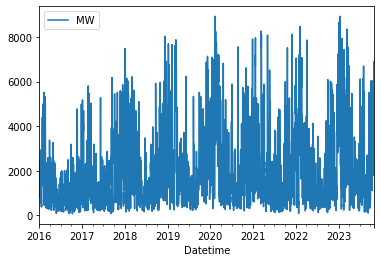

In [10]:
dg.plot()

In [11]:
dg['mean10']= dg.iloc[:,0].rolling(10, center=True, closed='both').mean()
dg['mean30']= dg.iloc[:,0].rolling(30, center=True, closed='both').mean()
dg['mean400']= dg.iloc[:,0].rolling(400, center=True, closed='both').mean()
dg

,MW,mean10,mean30,mean400
Datetime,,,,
2016-01-01,937.541667,NaN,NaN,NaN
2016-01-02,2323.354167,NaN,NaN,NaN
2016-01-03,1994.375000,NaN,NaN,NaN
2016-01-04,1595.781250,NaN,NaN,NaN
2016-01-05,1400.364583,NaN,NaN,NaN
...,...,...,...,...
2023-10-28,4342.885417,3768.060379,NaN,NaN
2023-10-29,6887.310000,3712.052875,NaN,NaN
2023-10-30,3117.989583,NaN,NaN,NaN


<Axes: xlabel='Datetime'>

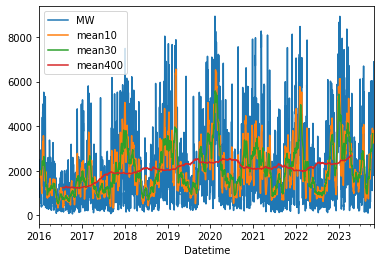

In [12]:
dg.plot()

<Axes: xlabel='Datetime'>

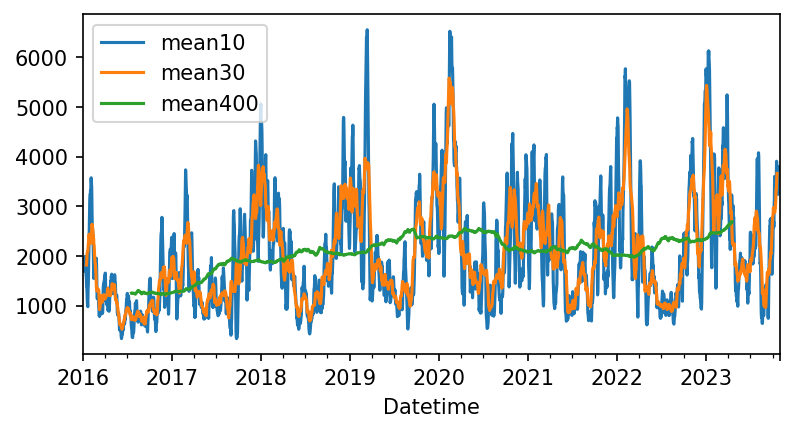

In [13]:
fig = plt.figure(figsize=(6,3), dpi=150)
ax = plt.axes()
dg[['mean10', 'mean30', 'mean400']].plot(ax=ax)


In [14]:
dh = df.resample("M").mean()
dh.shape

(95, 1)

<Axes: xlabel='Datetime'>

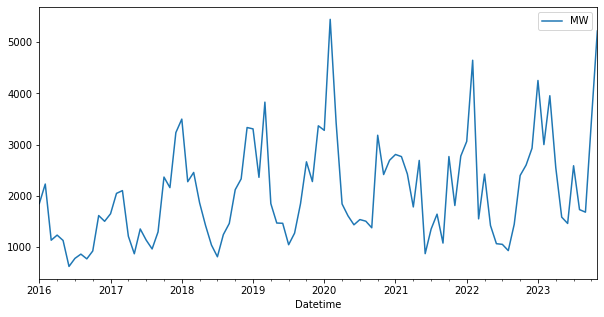

In [15]:
dh.plot(figsize=(10,5))